# The file is created by Shubharthak Sangharasha 

## @github: shubharthaksangharsha

# Importing required libraries 

In [4]:
#Importing required libraries 
import tensorflow as tf
import matplotlib.pyplot as plt 
import cv2
import random
import os
from helper_functions import plot_loss_curves, predict_and_plot, preprocess_filename, make_confusion_matrix, save_model
from helper_functions import create_y_labels
import pandas as pd 

# Preprocessing

In [5]:
train_dir = "./Data/train"
def preprocessing(directory="./Data/train/", validation_split = 0.1, target_size=(224, 224), batch_size=32):
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,
                                                                    validation_split=validation_split)

    train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                   target_size=target_size,
                                                   class_mode="categorical",
                                                   subset="training",
                                                   batch_size=batch_size,
                                                   seed=42,
                                                   shuffle=True)

    test_data = train_datagen.flow_from_directory(directory=train_dir,
                                                   target_size=target_size,
                                                   class_mode="categorical",
                                                   batch_size=batch_size,
                                                   subset="validation",
                                                   seed=42,
                                                   shuffle=True)
    return train_data, test_data

In [6]:
train_data, test_data = preprocessing()

Found 2701 images belonging to 10 classes.
Found 296 images belonging to 10 classes.


In [7]:
classes = list(train_data.class_indices.keys())
classes, len(classes)

(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 10)

# Model 1 - Base Model 
Model - 1: CNN layer, MaxPoolLayer, Flatten Layer and Dense Layer

In [8]:
#Set random seed 
tf.random.set_seed(42)
#Build the model 1
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, 3, input_shape=(224, 224, 3), activation="relu", padding="valid"),
    tf.keras.layers.MaxPool2D(3, 3, padding="valid"),
    tf.keras.layers.Conv2D(32, 3, 3, activation="relu", padding="valid"),
    tf.keras.layers.MaxPool2D(3, 3, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=len(classes), activation="softmax"),
])


#Compile the model 
model_1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

2022-10-01 23:00:06.499961: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shubharthak/.local/lib/python3.9/site-packages/cv2/../../lib64:
2022-10-01 23:00:06.500027: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-01 23:00:06.500057: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shubharthak): /proc/driver/nvidia/version does not exist
2022-10-01 23:00:06.500312: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 74, 74, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [10]:
history_1 = model_1.fit(train_data,
         epochs=5,
         steps_per_epoch=len(train_data),
         validation_data=test_data,
         validation_steps=len(test_data))

Epoch 1/5
85/85 [==============================] - 10s 105ms/step - loss: 1.4882 - accuracy: 0.6305 - val_loss: 0.7477 - val_accuracy: 0.8142
Epoch 2/5
85/85 [==============================] - 9s 108ms/step - loss: 0.1384 - accuracy: 0.9841 - val_loss: 0.3681 - val_accuracy: 0.9088
Epoch 3/5
85/85 [==============================] - 9s 100ms/step - loss: 0.0296 - accuracy: 0.9981 - val_loss: 0.3481 - val_accuracy: 0.9122
Epoch 4/5
85/85 [==============================] - 9s 100ms/step - loss: 0.0131 - accuracy: 0.9989 - val_loss: 0.3398 - val_accuracy: 0.9122
Epoch 5/5
85/85 [==============================] - 9s 99ms/step - loss: 0.0089 - accuracy: 0.9996 - val_loss: 0.3650 - val_accuracy: 0.9088


In [11]:
model_1_result = model_1.evaluate(test_data)
model_1_result

10/10 [==============================] - 1s 64ms/step - loss: 0.3650 - accuracy: 0.9088


[0.36495065689086914, 0.9087837934494019]

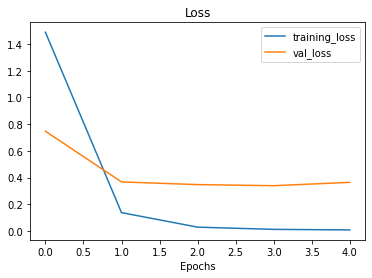

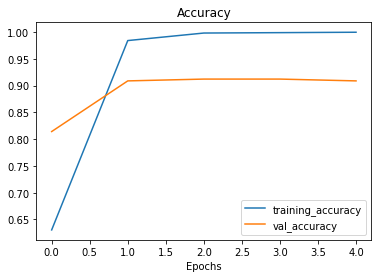

In [12]:
plot_loss_curves(history_1)

In [13]:
save_model(model_1)

In [14]:
classes

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [15]:
from helper_functions import preprocess_filename

In [16]:
filename = "./Data/D/Image_1664618649.8339853.jpg"

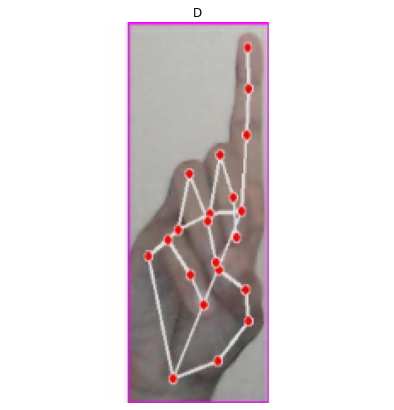

In [17]:
img = tf.io.read_file(filename)
img = tf.image.decode_image(img)
img = tf.image.resize(img, (224, 224))
img = img/ 255.
plt.figure(figsize=(10, 7))
plt.axis(False)
preds = model_1.predict(tf.expand_dims(img, axis = 0)).argmax()
pred_class = classes[preds]
plt.title(pred_class)
plt.imshow(img);

In [19]:
y_labels = create_y_labels(test_data)
y_labels

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32),
 array([0., 1., 0., 0., 0

In [21]:
y_preds = model_1.predict(test_data)
y_preds.shape

(296, 10)

In [22]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int32)

In [23]:
y_preds.argmax(axis = 1)

array([0, 5, 2, 2, 8, 0, 1, 2, 2, 3, 5, 7, 2, 7, 8, 1, 1, 8, 7, 4, 4, 5,
       5, 3, 3, 0, 8, 8, 5, 6, 6, 1, 7, 7, 6, 2, 6, 4, 0, 6, 6, 6, 6, 3,
       2, 7, 0, 2, 0, 5, 5, 4, 1, 0, 8, 0, 1, 4, 4, 3, 2, 0, 7, 7, 6, 3,
       2, 0, 2, 6, 5, 2, 0, 3, 2, 4, 2, 0, 0, 3, 2, 4, 1, 0, 9, 4, 2, 2,
       3, 2, 0, 5, 4, 7, 5, 0, 5, 3, 4, 2, 8, 4, 5, 3, 8, 6, 1, 8, 5, 8,
       1, 7, 0, 1, 3, 4, 3, 2, 3, 7, 5, 1, 4, 0, 2, 7, 7, 8, 0, 5, 0, 0,
       3, 6, 5, 4, 6, 8, 4, 2, 0, 2, 7, 3, 7, 5, 8, 6, 7, 2, 9, 2, 6, 0,
       1, 0, 4, 6, 8, 6, 1, 3, 8, 7, 1, 3, 7, 4, 0, 0, 4, 0, 0, 8, 3, 8,
       8, 0, 3, 1, 2, 5, 7, 6, 7, 0, 9, 8, 0, 7, 0, 4, 1, 6, 5, 7, 8, 4,
       2, 4, 4, 0, 0, 2, 8, 2, 1, 7, 5, 1, 4, 8, 5, 0, 0, 8, 2, 7, 7, 1,
       7, 0, 8, 6, 0, 1, 3, 8, 7, 0, 6, 5, 1, 7, 4, 6, 7, 8, 0, 3, 1, 4,
       0, 4, 3, 1, 5, 2, 6, 1, 0, 0, 5, 6, 2, 3, 3, 1, 8, 0, 3, 5, 0, 4,
       0, 8, 1, 1, 5, 6, 9, 6, 5, 1, 1, 7, 8, 0, 5, 0, 6, 8, 5, 4, 5, 3,
       2, 7, 4, 9, 0, 7, 2, 3, 0, 3])

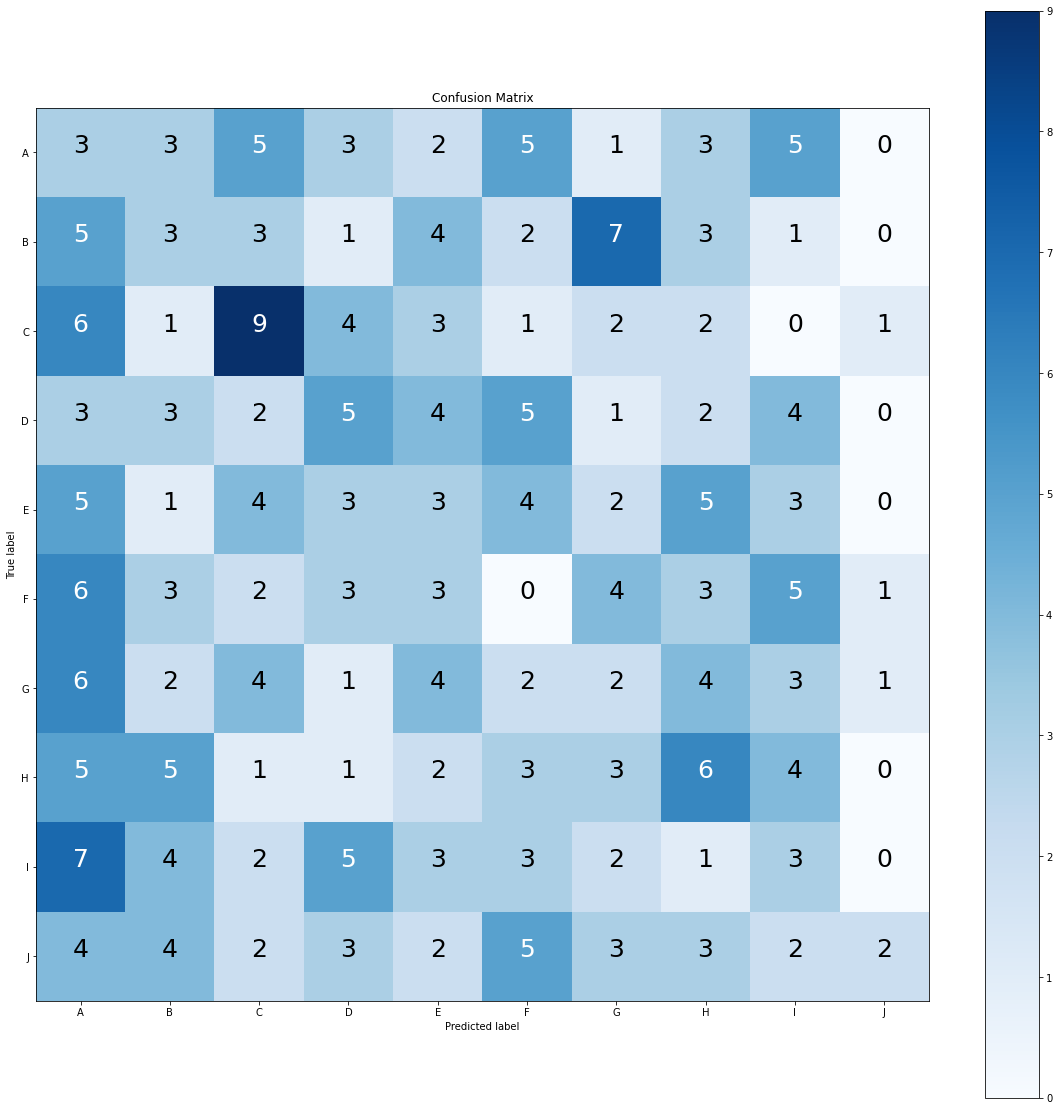

In [33]:
make_confusion_matrix(y_true=test_data.labels, 
                      y_pred=y_preds.argmax(axis=1), 
                      classes=classes, 
                      figsize=(20, 20), 
                      text_size=25,
                      savefig=True, 
                      no=1)

In [36]:
from sklearn.metrics import classification_report
report = classification_report(y_true=test_data.labels, 
                      y_pred=y_preds.argmax(axis=1), target_names=classes)
print(report)

              precision    recall  f1-score   support

           A       0.06      0.10      0.07        30
           B       0.10      0.10      0.10        29
           C       0.26      0.31      0.29        29
           D       0.17      0.17      0.17        29
           E       0.10      0.10      0.10        30
           F       0.00      0.00      0.00        30
           G       0.07      0.07      0.07        29
           H       0.19      0.20      0.19        30
           I       0.10      0.10      0.10        30
           J       0.40      0.07      0.11        30

    accuracy                           0.12       296
   macro avg       0.15      0.12      0.12       296
weighted avg       0.15      0.12      0.12       296



# Model 2 - 10 Epochs instead of 5 and adding Dropout Layer

In [37]:
train_data, test_data = preprocessing()

Found 2701 images belonging to 10 classes.
Found 296 images belonging to 10 classes.


In [38]:
classes = list(train_data.class_indices.keys())
classes

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [39]:
#Set random seed 
tf.random.set_seed(42)
#Build the model 
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, 3, input_shape=(224, 224, 3), activation="relu", padding="valid"),
    tf.keras.layers.MaxPool2D(3, 3, padding="valid"),
    tf.keras.layers.Conv2D(32, 3, 3, activation="relu", padding="valid"),
    tf.keras.layers.MaxPool2D(3, 3, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=len(classes), activation="softmax"),
])


#Compile the model 
model_2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [40]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 74, 74, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [41]:
history_2 = model_2.fit(train_data,
         epochs=10,
         steps_per_epoch=len(train_data),
         validation_data=test_data,
         validation_steps=len(test_data))

Epoch 1/10
85/85 [==============================] - 10s 116ms/step - loss: 1.4766 - accuracy: 0.6601 - val_loss: 0.7155 - val_accuracy: 0.8142
Epoch 2/10
85/85 [==============================] - 9s 109ms/step - loss: 0.1219 - accuracy: 0.9863 - val_loss: 0.4409 - val_accuracy: 0.8919
Epoch 3/10
85/85 [==============================] - 10s 112ms/step - loss: 0.0298 - accuracy: 0.9978 - val_loss: 0.3687 - val_accuracy: 0.9020
Epoch 4/10
85/85 [==============================] - 9s 106ms/step - loss: 0.0125 - accuracy: 0.9989 - val_loss: 0.3873 - val_accuracy: 0.9020
Epoch 5/10
85/85 [==============================] - 9s 104ms/step - loss: 0.0078 - accuracy: 0.9989 - val_loss: 0.4030 - val_accuracy: 0.9054
Epoch 6/10
85/85 [==============================] - 9s 102ms/step - loss: 0.0050 - accuracy: 0.9996 - val_loss: 0.3657 - val_accuracy: 0.9122
Epoch 7/10
85/85 [==============================] - 9s 107ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.4154 - val_accuracy: 0.8986
Epoc

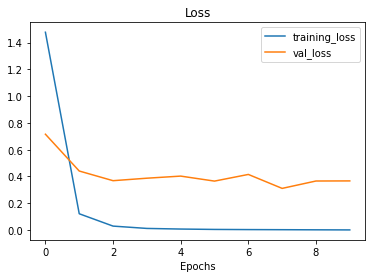

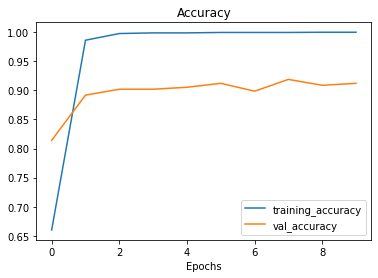

In [43]:
plot_loss_curves(history_2, no=2)

In [44]:
save_model(model_2, 2)

In [47]:
model_2_result = model_2.evaluate(test_data)
model_2_result

10/10 [==============================] - 1s 57ms/step - loss: 0.3671 - accuracy: 0.9122


[0.36708879470825195, 0.912162184715271]

In [46]:
model_1_result

[0.36495065689086914, 0.9087837934494019]

In [ ]:
y_labels

In [48]:
y_preds = model_2.predict(test_data)
y_preds.shape

(296, 10)

In [49]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int32)

In [ ]:
y_preds.argmax(axis = 1)

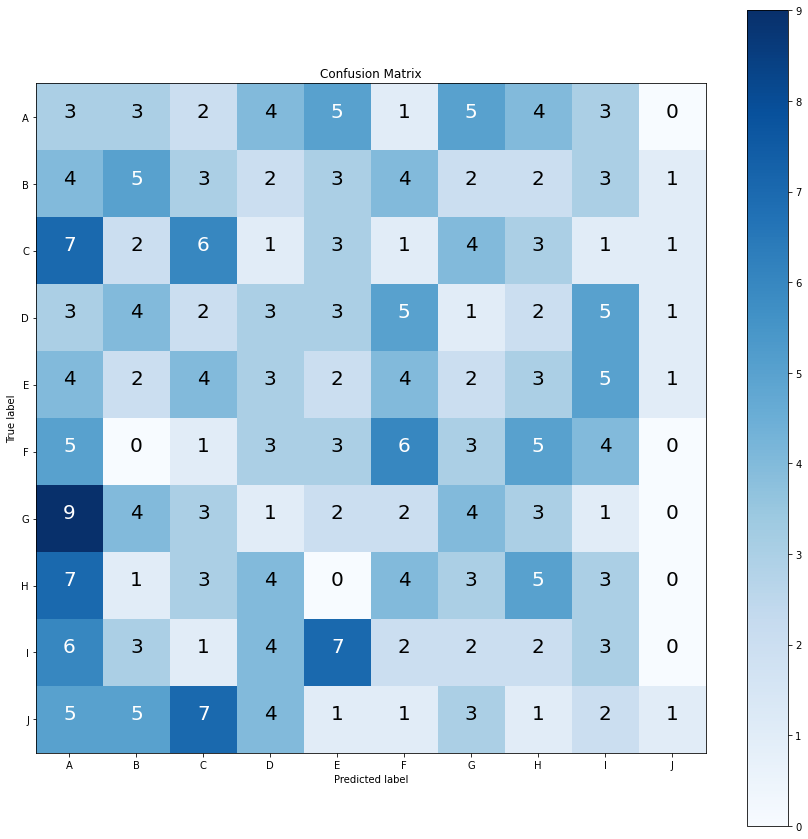

In [50]:
make_confusion_matrix(y_true=test_data.labels, 
                      y_pred=y_preds.argmax(axis=1), 
                      classes=classes, figsize=(15, 15), text_size=20,savefig=True, no=2)

In [51]:
from sklearn.metrics import classification_report
report = classification_report(y_true=test_data.labels, 
                      y_pred=y_preds.argmax(axis=1), target_names=classes)
print(report)

              precision    recall  f1-score   support

           A       0.06      0.10      0.07        30
           B       0.17      0.17      0.17        29
           C       0.19      0.21      0.20        29
           D       0.10      0.10      0.10        29
           E       0.07      0.07      0.07        30
           F       0.20      0.20      0.20        30
           G       0.14      0.14      0.14        29
           H       0.17      0.17      0.17        30
           I       0.10      0.10      0.10        30
           J       0.20      0.03      0.06        30

    accuracy                           0.13       296
   macro avg       0.14      0.13      0.13       296
weighted avg       0.14      0.13      0.13       296



In [52]:
def preprocess_img(model, filename):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, (224, 224))
    img = img/ 255.
    plt.figure(figsize=(10, 7))
    plt.axis(False)
    preds = model.predict(tf.expand_dims(img, axis = 0)).argmax()
    pred_class = classes[preds]
    plt.title(pred_class)
    plt.imshow(img);

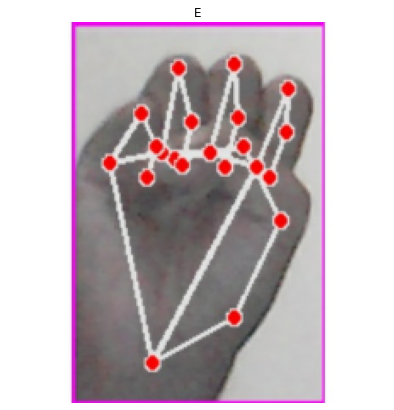

In [53]:
preprocess_img(model_2, filename="./Data/E/Image_1664627280.4751546.jpg")

# Model 3 - Changing the padding to same

In [65]:
test_data.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

In [54]:
#Set random seed 
tf.random.set_seed(42)
#Build the model 
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, 3, input_shape=(224, 224, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(3, 3, padding="same"),
    tf.keras.layers.Conv2D(32, 3, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(3, 3, padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=len(classes), activation="softmax"),
])


#Compile the model 
model_3.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [55]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 75, 75, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 32)          4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 288)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [56]:
history_3 = model_3.fit(train_data,
         epochs=10,
         steps_per_epoch=len(train_data),
         validation_data=test_data,
         validation_steps=len(test_data))

Epoch 1/10
85/85 [==============================] - 10s 106ms/step - loss: 1.4395 - accuracy: 0.5816 - val_loss: 0.5484 - val_accuracy: 0.8716
Epoch 2/10
85/85 [==============================] - 9s 108ms/step - loss: 0.1571 - accuracy: 0.9630 - val_loss: 0.0860 - val_accuracy: 0.9966
Epoch 3/10
85/85 [==============================] - 9s 104ms/step - loss: 0.0387 - accuracy: 0.9937 - val_loss: 0.0633 - val_accuracy: 0.9865
Epoch 4/10
85/85 [==============================] - 9s 105ms/step - loss: 0.0186 - accuracy: 0.9959 - val_loss: 0.0473 - val_accuracy: 0.9831
Epoch 5/10
85/85 [==============================] - 9s 103ms/step - loss: 0.0077 - accuracy: 0.9996 - val_loss: 0.0214 - val_accuracy: 0.9966
Epoch 6/10
85/85 [==============================] - 9s 104ms/step - loss: 0.0049 - accuracy: 0.9996 - val_loss: 0.0283 - val_accuracy: 0.9831
Epoch 7/10
85/85 [==============================] - 9s 103ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch

In [57]:
model_3_result = model_3.evaluate(test_data)
model_3_result

10/10 [==============================] - 1s 70ms/step - loss: 0.0144 - accuracy: 0.9932


[0.014441411010921001, 0.9932432174682617]

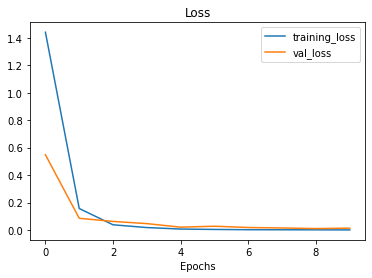

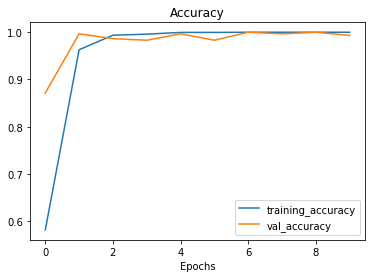

In [58]:
plot_loss_curves(history_3, no=3)

In [59]:
save_model(model_3, 3)

In [60]:
y_preds = model_3.predict(test_data)
y_preds.shape

(296, 10)

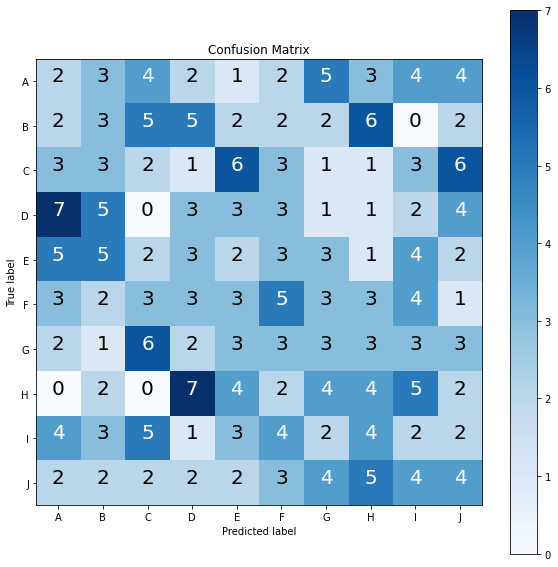

In [62]:
make_confusion_matrix(y_true=test_data.labels, 
                      y_pred=y_preds.argmax(axis=1), 
                      classes=classes, text_size=20,savefig=True, no=3)

In [64]:
classes, len(classes)

(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 10)

In [ ]:
preprocess_img(model_3, filename="./Data/E/Image_1664627280.4751546.jpg")

In [67]:
y_preds

array([[1.0000000e+00, 2.6050062e-16, 1.6869975e-09, ..., 7.8222899e-13,
        3.5624750e-09, 2.3319964e-09],
       [1.1416335e-03, 1.5847137e-08, 9.9850059e-01, ..., 4.9258437e-09,
        3.1376869e-05, 3.2586066e-04],
       [5.6475314e-05, 1.5375683e-08, 4.8964418e-04, ..., 2.1606649e-04,
        7.9476522e-06, 9.9922574e-01],
       ...,
       [4.2063127e-07, 1.0047569e-05, 4.5496463e-08, ..., 1.3245241e-06,
        8.9018446e-05, 3.7304215e-08],
       [1.7404376e-06, 1.2949668e-10, 7.3423143e-05, ..., 7.4308505e-06,
        2.2081658e-06, 9.9991083e-01],
       [4.9922751e-06, 9.8687664e-08, 5.5449647e-08, ..., 2.9063198e-01,
        1.2399344e-05, 3.5559104e-04]], dtype=float32)

In [68]:
from sklearn.metrics import classification_report
report = classification_report(y_true=test_data.labels, 
                      y_pred=y_preds.argmax(axis=1), target_names=classes)
print(report)

              precision    recall  f1-score   support

           A       0.07      0.07      0.07        30
           B       0.10      0.10      0.10        29
           C       0.07      0.07      0.07        29
           D       0.10      0.10      0.10        29
           E       0.07      0.07      0.07        30
           F       0.17      0.17      0.17        30
           G       0.11      0.10      0.11        29
           H       0.13      0.13      0.13        30
           I       0.06      0.07      0.07        30
           J       0.13      0.13      0.13        30

    accuracy                           0.10       296
   macro avg       0.10      0.10      0.10       296
weighted avg       0.10      0.10      0.10       296



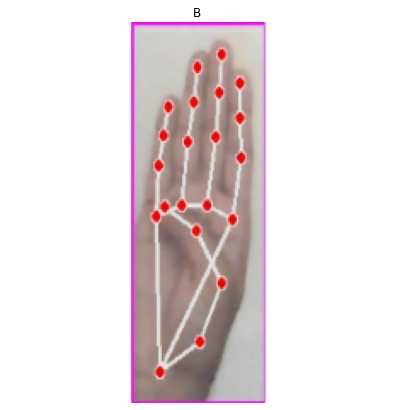

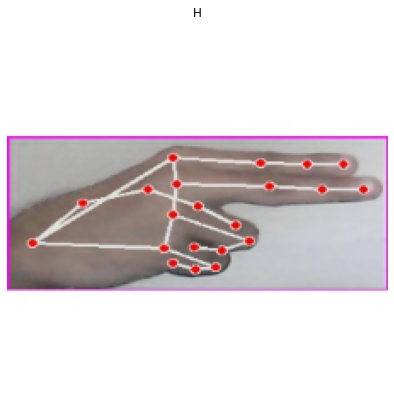

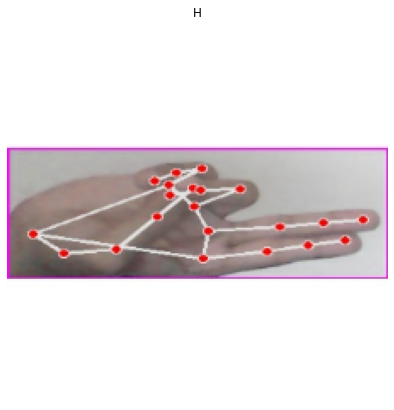

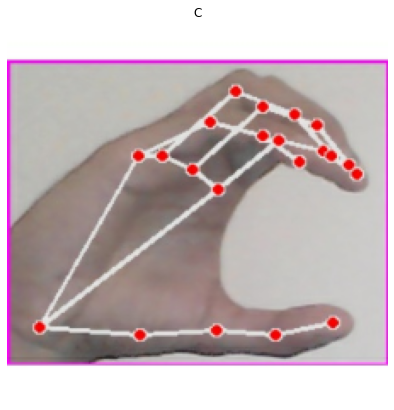

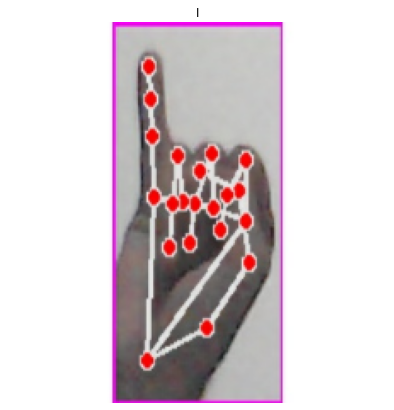

In [70]:
import random, os
random_class = []
filenames = []
for i in range(5):
    random_class.append(random.choice(classes))
for i in random_class:
    random_filename = random.choice(os.listdir(f"./Data/{i}/"))
    filenames.append(f"./Data/{i}/{random_filename}")
for i in filenames:
    preprocess_img(model_3, i)

# Model 4- Adding extra Convolutional and MaxPooling Layer 

In [71]:
#Set random seed 
tf.random.set_seed(42)
#Build the model - 4
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, 3, input_shape=(224, 224, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(3, 3, padding="same"),
    tf.keras.layers.Conv2D(32, 3, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(3, 3, padding="same"),
    tf.keras.layers.Conv2D(64, 3, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(3, 3, padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=len(classes), activation="softmax"),
])


#Compile the model 
model_4.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [72]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 75, 75, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 32)          4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 64)        

In [73]:
history_4 = model_4.fit(train_data,
         epochs=10,
         steps_per_epoch=len(train_data),
         validation_data=test_data,
         validation_steps=len(test_data))

Epoch 1/10
85/85 [==============================] - 10s 115ms/step - loss: 1.6196 - accuracy: 0.4920 - val_loss: 0.4437 - val_accuracy: 0.9324
Epoch 2/10
85/85 [==============================] - 10s 118ms/step - loss: 0.2119 - accuracy: 0.9345 - val_loss: 0.1141 - val_accuracy: 0.9561
Epoch 3/10
85/85 [==============================] - 9s 107ms/step - loss: 0.0459 - accuracy: 0.9907 - val_loss: 0.1171 - val_accuracy: 0.9595
Epoch 4/10
85/85 [==============================] - 10s 116ms/step - loss: 0.0178 - accuracy: 0.9970 - val_loss: 0.0597 - val_accuracy: 0.9730
Epoch 5/10
85/85 [==============================] - 11s 123ms/step - loss: 0.0064 - accuracy: 0.9993 - val_loss: 0.0672 - val_accuracy: 0.9696
Epoch 6/10
85/85 [==============================] - 9s 109ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0695 - val_accuracy: 0.9696
Epoch 7/10
85/85 [==============================] - 10s 112ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0803 - val_accuracy: 0.9696
E

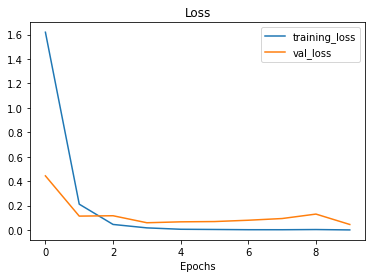

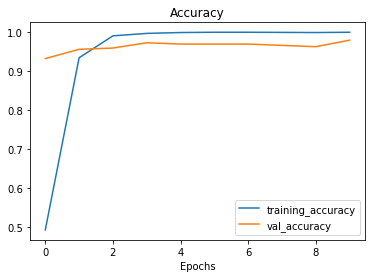

In [74]:
plot_loss_curves(history_4, no=4)

In [75]:
save_model(model_4, 4)

In [76]:
model_4_result = model_4.evaluate(test_data)
model_4_result

10/10 [==============================] - 1s 66ms/step - loss: 0.0456 - accuracy: 0.9797


[0.045627955347299576, 0.9797297120094299]

In [77]:
y_preds = model_4.predict(test_data)

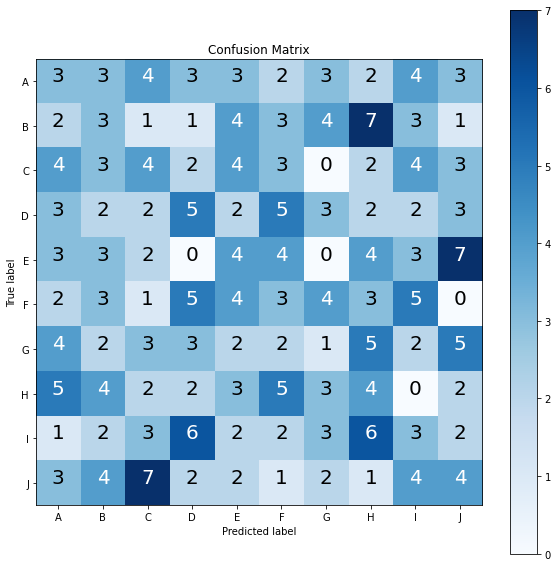

In [78]:
make_confusion_matrix(y_true=test_data.labels, 
                      y_pred=y_preds.argmax(axis=1), 
                      classes=classes, text_size=20,savefig=True, no=4)

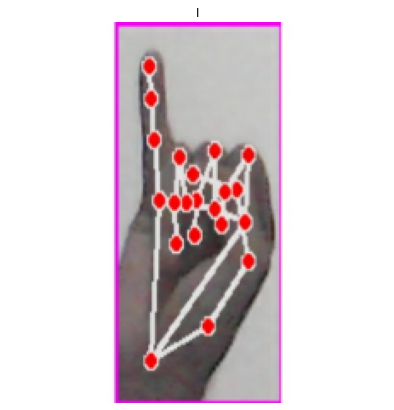

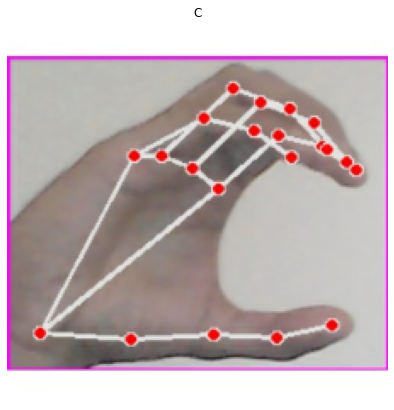

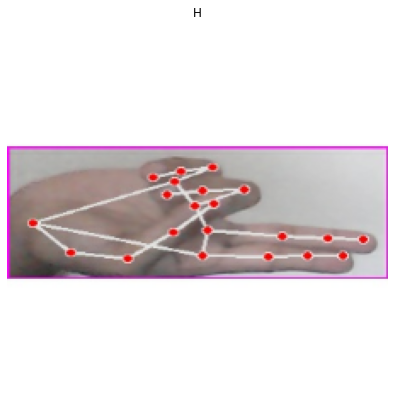

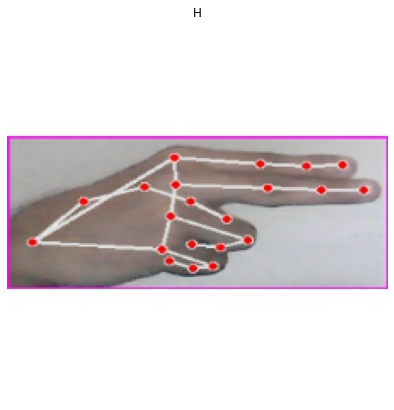

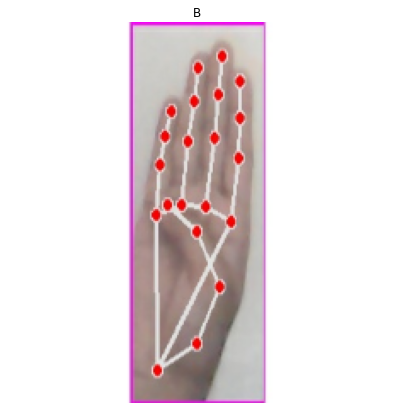

In [79]:
import random 
random_class = []
filenames = []
for i in range(5):
    random_class.append(random.choice(classes))
for i in random_class:
    random_filename = random.choice(os.listdir(f"./Data/{i}/"))
    filenames.append(f"./Data/{i}/{random_filename}")
for i in filenames:
    preprocess_img(model_4, i)

In [82]:
df = pd.DataFrame(index=["Loss","Accuracy"])
df['Model 1'] = model_1_result
df["Model 2"] = model_2_result
df["Model 3"] = model_3_result
df["Model 4"] = model_4_result
df

,Model 1,Model 2,Model 3,Model 4
Loss,0.364951,0.367089,0.014441,0.045628
Accuracy,0.908784,0.912162,0.993243,0.979730
